#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [3]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [14]:
model = Sequential()

In [10]:
#卷積層1

In [15]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [16]:
model.add(Dropout(rate=0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
#卷積層2與池化層2

In [19]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [23]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [24]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [25]:
model.add(Dense(10, activation='softmax'))

In [26]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [27]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 128s 3ms/sample - loss: 2.3078 - accuracy: 0.1109 - val_loss: 2.2880 - val_accuracy: 0.1513
Epoch 2/12
37500/37500 [==============================] - 131s 4ms/sample - loss: 2.2786 - accuracy: 0.1395 - val_loss: 2.2742 - val_accuracy: 0.1878
Epoch 3/12
37500/37500 [==============================] - 135s 4ms/sample - loss: 2.2578 - accuracy: 0.1566 - val_loss: 2.2579 - val_accuracy: 0.2129
Epoch 4/12
37500/37500 [==============================] - 124s 3ms/sample - loss: 2.2319 - accuracy: 0.1800 - val_loss: 2.2360 - val_accuracy: 0.2475
Epoch 5/12
37500/37500 [==============================] - 134s 4ms/sample - loss: 2.1963 - accuracy: 0.2028 - val_loss: 2.2064 - val_accuracy: 0.2710
Epoch 6/12
37500/37500 [==============================] - 141s 4ms/sample - loss: 2.1516 - accuracy: 0.2203 - val_loss: 2.1675 - val_accuracy: 0.2852
Epoch 7/12
37500/37500 [==========================

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [9]:
# 宣告採用序列模型
model_MSE= Sequential()
#卷積層1與池化層1
model_MSE.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model_MSE.add(Dropout(rate=0.25))
model_MSE.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model_MSE.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model_MSE.add(Dropout(0.25))
model_MSE.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model_MSE.add(Flatten())
model_MSE.add(Dropout(0.25))
#建立全網路連接層
model_MSE.add(Dense(1024, activation='relu'))
model_MSE.add(Dropout(0.25))
#建立輸出層
model_MSE.add(Dense(10, activation='softmax'))
#檢查model 的STACK
model_MSE.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])
train_history_MSE=model_MSE.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 136s 4ms/sample - loss: 0.0703 - accuracy: 0.4262 - val_loss: 0.0623 - val_accuracy: 0.5462
Epoch 2/12
37500/37500 [==============================] - 125s 3ms/sample - loss: 0.0558 - accuracy: 0.5746 - val_loss: 0.0545 - val_accuracy: 0.6121
Epoch 3/12
37500/37500 [==============================] - 121s 3ms/sample - loss: 0.0500 - accuracy: 0.6277 - val_loss: 0.0520 - val_accuracy: 0.6282
Epoch 4/12
37500/37500 [==============================] - 121s 3ms/sample - loss: 0.0455 - accuracy: 0.6651 - val_loss: 0.0473 - val_accuracy: 0.6660
Epoch 5/12
37500/37500 [==============================] - 119s 3ms/sample - loss: 0.0421 - accuracy: 0.6919 - val_loss: 0.0464 - val_accuracy: 0.6770
Epoch 6/12
37500/37500 [==============================] - 118s 3ms/sample - loss: 0.0387 - accuracy: 0.7202 - val_loss: 0.0439 - val_accuracy: 0.6860
Epoch 7/12
37500/37500 [==========================

In [11]:
# 宣告採用序列模型
model_bin= Sequential()
#卷積層1與池化層1
model_bin.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model_bin.add(Dropout(rate=0.25))
model_bin.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model_bin.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model_bin.add(Dropout(0.25))
model_bin.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model_bin.add(Flatten())
model_bin.add(Dropout(0.25))
#建立全網路連接層
model_bin.add(Dense(1024, activation='relu'))
model_bin.add(Dropout(0.25))
#建立輸出層
model_bin.add(Dense(10, activation='softmax'))
#檢查model 的STACK
model_bin.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
train_history_bin=model_bin.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 132s 4ms/sample - loss: 0.2420 - accuracy: 0.9096 - val_loss: 0.2177 - val_accuracy: 0.9128
Epoch 2/12
37500/37500 [==============================] - 134s 4ms/sample - loss: 0.1925 - accuracy: 0.9243 - val_loss: 0.1939 - val_accuracy: 0.9239
Epoch 3/12
37500/37500 [==============================] - 124s 3ms/sample - loss: 0.1694 - accuracy: 0.9335 - val_loss: 0.1717 - val_accuracy: 0.9325
Epoch 4/12
37500/37500 [==============================] - 126s 3ms/sample - loss: 0.1517 - accuracy: 0.9405 - val_loss: 0.1640 - val_accuracy: 0.9371
Epoch 5/12
37500/37500 [==============================] - 140s 4ms/sample - loss: 0.1351 - accuracy: 0.9467 - val_loss: 0.1520 - val_accuracy: 0.9412
Epoch 6/12
37500/37500 [==============================] - 125s 3ms/sample - loss: 0.1220 - accuracy: 0.9519 - val_loss: 0.1444 - val_accuracy: 0.9445
Epoch 7/12
37500/37500 [==========================

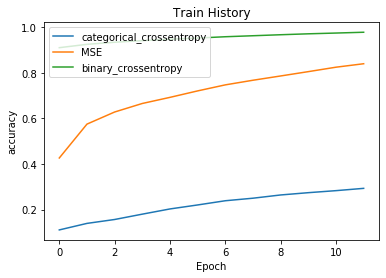

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history['accuracy'])
plt.plot(train_history_MSE.history['accuracy'])
plt.plot(train_history_bin.history['accuracy'])
plt.title('Train History')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['categorical_crossentropy', 'MSE','binary_crossentropy'], loc='upper left')
plt.show()

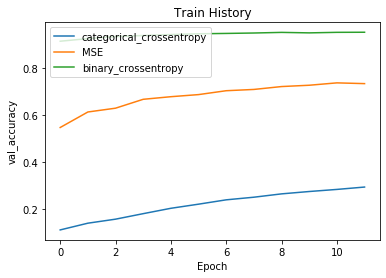

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history['accuracy'])
plt.plot(train_history_MSE.history['val_accuracy'])
plt.plot(train_history_bin.history['val_accuracy'])
plt.title('Train History')
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.legend(['categorical_crossentropy', 'MSE','binary_crossentropy'], loc='upper left')
plt.show()